In [1]:
import os

In [2]:
!pwd

/content


In [3]:
ROOT="/content/drive/MyDrive/Deep Learning Ineuron/PyTorch"
os.chdir(ROOT)

In [4]:
os.getcwd()

'/content/drive/MyDrive/Deep Learning Ineuron/PyTorch'

In [5]:
import torch

# Tensors

In [6]:
num=1
type(num)

int

In [7]:
t1=torch.tensor(1.)
t1
# it's always better to take floating number.
# gpu will always take tensor type data not int ,float ,then only we can able to access gpu performance of the data.

tensor(1.)

In [8]:
type(t1)

torch.Tensor

In [9]:
t1.dtype

torch.float32

In [10]:
# Vector
t2=torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [11]:
# Matrix 2d
t3=torch.tensor([
    [5.,6],
    [6,8],
    [9,10]])
t3

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.]])

In [12]:
# 3-dimensional array
t4=torch.tensor([
    [[11,12,13],
    [13,14,15]],
    [[15,16,17],
     [17,18,19.]]
])

t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [13]:
print(t1)
t1.shape

tensor(1.)


torch.Size([])

In [14]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [15]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [16]:
print(t4)
t4.shape

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])


torch.Size([2, 2, 3])

# Tensor Function

In [17]:
t6= torch.full((3,2),42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [18]:
t3

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.]])

In [19]:
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [20]:
t7=torch.cat((t3,t6))
t7

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [21]:
t8=torch.sin(t7) #sine distribution
t8

tensor([[-0.9589, -0.2794],
        [-0.2794,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [22]:
t9=t8.reshape(3,2,2)
t9

tensor([[[-0.9589, -0.2794],
         [-0.2794,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

In [23]:
# Interroperability with numpy

import numpy as np

In [24]:
x=np.array([[1,2],
           [3,4.]])
x

array([[1., 2.],
       [3., 4.]])

In [25]:
type(x)

numpy.ndarray

In [26]:
 # image --> number ==> will get numpy array not tensor.

In [27]:
y=torch.from_numpy(x) #converts numpy array to tensor.
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [28]:
type(y)

torch.Tensor

In [29]:
y # always we don't do operations on tensor , these operations on top of tensor are little bit costlier

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [30]:
y.numpy() #tensor --> numpy

array([[1., 2.],
       [3., 4.]])

# Neural Network Using Pytorch

In [31]:
import torch
from torch import nn
from torch.utils.data import DataLoader #used to load the data in the memory
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda,Compose
import matplotlib.pyplot as plt

In [32]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15533241.23it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 371207.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5544714.20it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21336242.09it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [33]:
batch_size=64

train_dataloader= DataLoader(training_data,batch_size=batch_size)
test_dataloader= DataLoader(test_data,batch_size=batch_size)

In [34]:
train_dataloader #It loads the data in memory it returns object not number.

In [35]:
for x,y in train_dataloader:
  print(x.shape)
  break #tesnor

torch.Size([64, 1, 28, 28])


In [36]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [37]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )

    def forward(self,x):
      x=self.flatten(x)
      logits=self.linear_relu_stack(x)
      return logits

In [38]:
model=NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [39]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)

In [40]:
# Taining the data
def train(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset)
    model.train()
    for batch, (x,y) in enumerate(dataloader):
      x,y=x.to(device),y.to(device)

      #compute prediction error
      pred =model(x)
      loss=loss_fn(pred,y)

      #Backpropogation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 100 ==0:
        loss,current=loss.item(),batch * len(x)
        print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [41]:
# Testing the data
def test(dataloader,model,loss_fn):
  size=len(dataloader.dataset)
  num_batches =len(dataloader)
  model.eval()
  test_loss,correct=0,0
  with torch.no_grad():
    for x,y in dataloader:
      x,y=x.to(device),y.to(device)
      pred=model(x)
      test_loss+= loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss/=num_batches
  correct/=size
  print(f"Test Error:  \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [42]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n--------------------------")
  train(train_dataloader,model,loss_fn,optimizer)
  test(test_dataloader,model,loss_fn)
print("Done!")


Epoch 1
--------------------------
loss: 2.291746 [    0/60000]
loss: 2.286587 [ 6400/60000]
loss: 2.270923 [12800/60000]
loss: 2.270735 [19200/60000]
loss: 2.250073 [25600/60000]
loss: 2.230057 [32000/60000]
loss: 2.227997 [38400/60000]
loss: 2.196632 [44800/60000]
loss: 2.182834 [51200/60000]
loss: 2.169612 [57600/60000]
Test Error:  
 Accuracy: 55.1%, Avg loss: 2.160509 

Epoch 2
--------------------------
loss: 2.161265 [    0/60000]
loss: 2.154843 [ 6400/60000]
loss: 2.101299 [12800/60000]
loss: 2.120824 [19200/60000]
loss: 2.069312 [25600/60000]
loss: 2.018806 [32000/60000]
loss: 2.033898 [38400/60000]
loss: 1.959877 [44800/60000]
loss: 1.947104 [51200/60000]
loss: 1.890891 [57600/60000]
Test Error:  
 Accuracy: 62.3%, Avg loss: 1.888107 

Epoch 3
--------------------------
loss: 1.911826 [    0/60000]
loss: 1.885806 [ 6400/60000]
loss: 1.772968 [12800/60000]
loss: 1.815896 [19200/60000]
loss: 1.707885 [25600/60000]
loss: 1.662716 [32000/60000]
loss: 1.673835 [38400/60000]
loss: 

In [43]:
# save model
torch.save(model.state_dict(),"model.pth")
print("Saved Pytorch Model state to model.pth")

Saved Pytorch Model state to model.pth


In [44]:
#load the model
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [45]:
# prediction

classes= [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [46]:
x,y =test_data[0][0], test_data[0][1]

In [47]:
y

9

In [48]:
with torch.no_grad():
  pred=model(x)
  predicted,actual=classes[pred[0].argmax(0)],classes[y]
  print(f'Predicted : "{predicted}",Actual: "{actual}"')

Predicted : "Ankle boot",Actual: "Ankle boot"


In [49]:
#Assignment -- cifar10 dataset

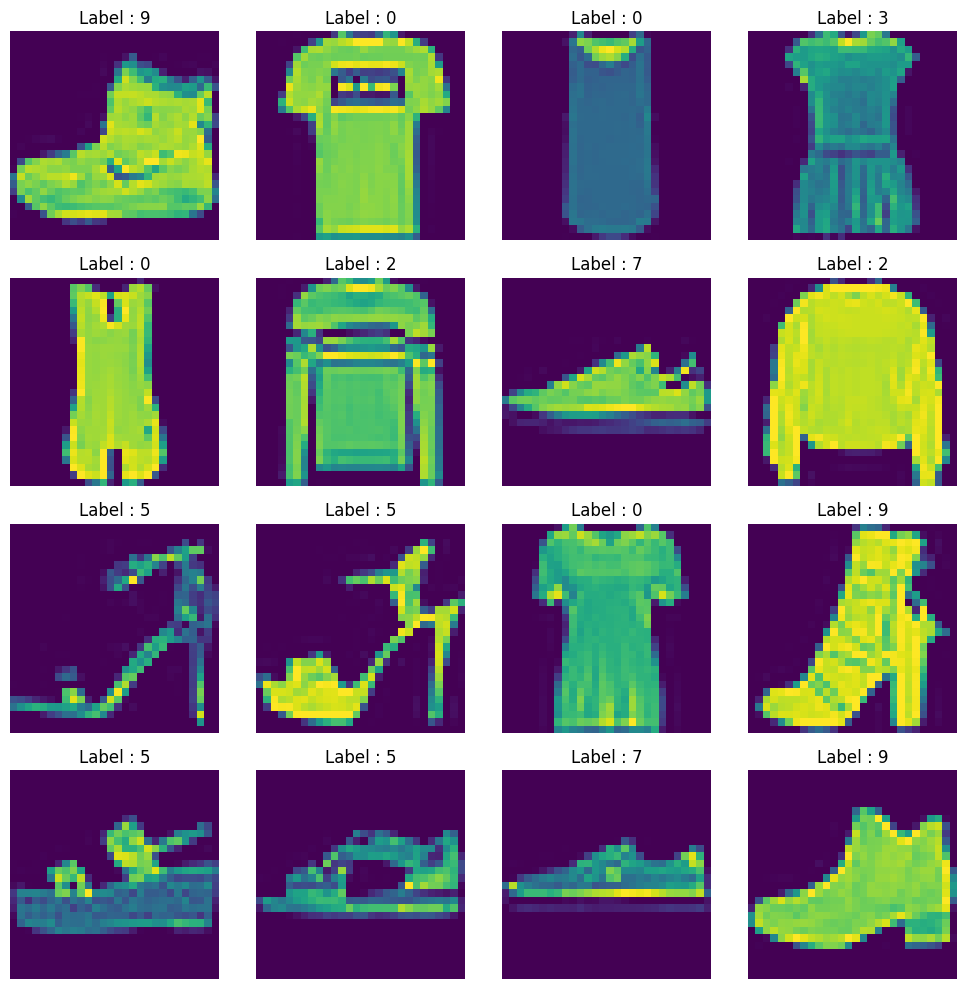

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Loop through the training dataloader to get a batch
for images,labels in train_dataloader:
  break #Get the first batch and exit loop

# Convert the images to numpy arrays
images=images.numpy()

#plot the images
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i, ax in enumerate(axes.flat):
  #Display the image
  ax.imshow(np.transpose(images[i],(1,2,0)))
  ax.set_title(f"Label : {labels[i].item()}")
  ax.axis('off')

plt.tight_layout()
plt.show()